**Kernel Principal Component Analysis (KPCA)**


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

In [ ]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Pre-processing
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Applying KPCA (kernel RBF)
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)
# Plot transformed data
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# Applying KPCA (kernel polynomial, degree=3)
kpca = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca = kpca.fit_transform(X_std)
# Plot transformed data
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Question 1:**

a) Với tập dữ liệu iris, hãy áp dụng KPCA với các kernel function khác nhau và cho nhận xét.

b) Viết một đoạn Python code (với dataset iris) áp dụng PCA và KPCA, plot transformed data và cho nhận xét. Bạn hãy cho biết KPCA tối ưu hơn PCA ở điểm nào trong ví dụ trên.


**Applications of PCA**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

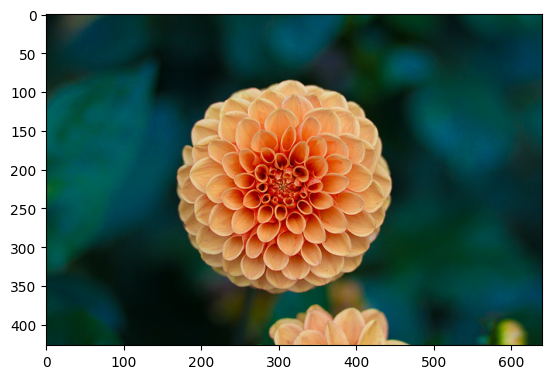

In [29]:
from sklearn.datasets import load_sample_image

# load the sample image
img = load_sample_image('flower.jpg')
plt.imshow(img)
plt.show()

In [30]:
img.shape

(427, 640, 3)

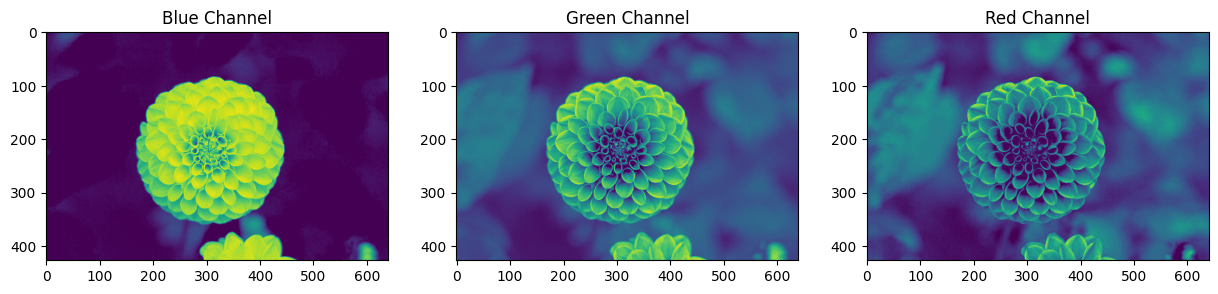

In [31]:
#Split the image into 3 channels and display each image
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [32]:
#The data of blue channel
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,2,3,7,8,6,4,5,8,6,9,...,1,0,0,0,0,0,1,1,0,0
1,1,3,7,8,7,6,7,9,6,9,...,0,0,0,0,0,0,1,0,1,1
2,2,6,7,7,5,6,7,7,8,10,...,0,0,0,0,0,0,0,1,1,1
3,3,7,7,5,5,4,7,6,9,10,...,1,0,1,1,1,0,1,1,0,1
4,5,8,8,6,5,5,7,7,10,11,...,0,0,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,2,2,2,2,2,2,0,0,1,1,...,5,3,4,5,5,5,5,6,8,8
423,0,0,0,1,2,2,0,0,1,1,...,3,3,5,6,4,2,4,6,8,7
424,0,1,1,1,0,0,0,0,0,0,...,3,4,5,6,5,5,3,5,6,7
425,0,1,1,2,1,0,0,1,2,1,...,3,3,5,3,4,4,4,6,7,7


In [33]:
#divide all the data of all channels by 255 so that the data is scaled between 0 and 1
df_blue = blue/255
df_green = green/255
df_red = red/255

In [34]:
#Fit and transform the data in PCA
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [35]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(427, 50)
(427, 50)
(427, 50)


In [36]:
#check the sum of explained variance ratios of the 50 PCA components 
#(i.e. most dominated 50 Eigenvalues) for each channel.
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9934506466584369
Green Channel: 0.9738161142903167
Red Channel  : 0.9678940018506036


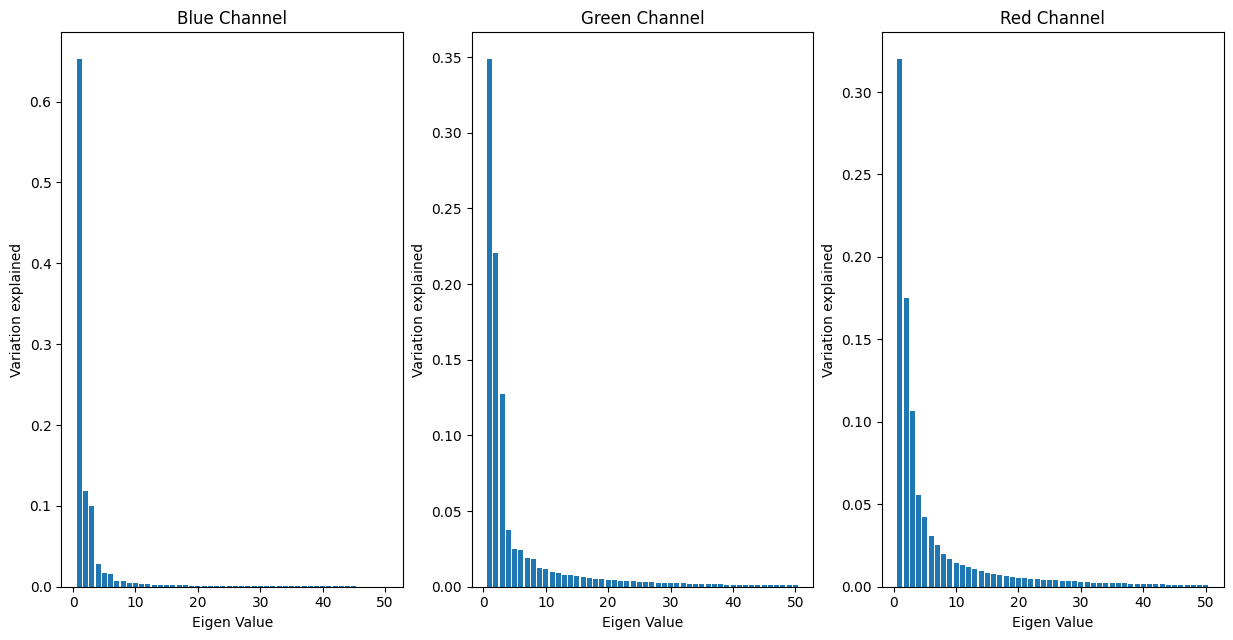

In [37]:
#Plot bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

# Reconstruct the image and visualize


We have completed our PCA dimensionality reduction. Now we will visualize the image again and for that, we have to reverse transform the data first and then merge the data of all the 3 channels into one.

In [38]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(427, 640) (427, 640) (427, 640)


We can inverse transform the data to the original shape (although each channel is still separated), but as we know all the images are already compressed.

We will merge all the channels into one and print the final shape:

In [39]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(427, 640, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


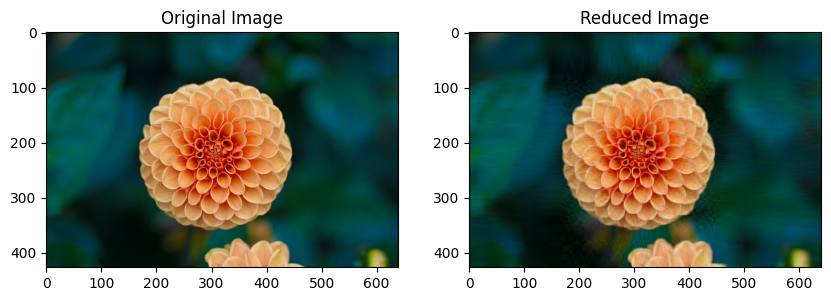

In [40]:
#Display both the Images (original and reduced) side by side.
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

**Question 2:**

Run Python code với một image khác, đưa ra nhận xét về original và reduced image.

**Question 3:**

Tìm thêm một ứng dụng khác của PCA (ví dụ trong nhận diện khuôn mặt), cung cấp một đoạn Python code đơn giản và explain các bước cũng như kết quả nhận được.